# Import Packages

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Set display option to maximum columns for dataframe and do not show any warings

In [235]:
pd.set_option('display.max_columns', None) 
pd.options.mode.chained_assignment = None 

# Loading Data and viewing it by all process

In [236]:
loan_df = pd.read_csv("loan.csv",low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Shape of the input data

In [237]:
loan_df.shape

(39717, 111)

##### Column and data types

In [238]:
loan_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

# Cleaning the Data

##### The below function to find the eligible and non eligible columns by checking for percentage of nulls in the columns. The threshold percentage for deciding eligible and non eligible columns can be passed as parameter to this function

In [239]:
def findAcceptableNonacceptableColumns(loan_df,percent):
    acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() < percent * len(loan_df)]].columns
    non_acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() > percent * len(loan_df)]].columns
    return acceptable_columns,non_acceptable_columns

### Removing Null column which are very much eligible and also the column which are very much unique and not import for the analysis

##### We have considered columns which have null values more than 35% is not an acceptable column for this analysis.

In [240]:
acceptable_columns,non_acceptable_columns = findAcceptableNonacceptableColumns(loan_df,0.35)

In [241]:
acceptable_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [242]:
non_acceptable_columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

### Removing Null columns

In [243]:
cleaned_loan_df = loan_df[acceptable_columns]

### Removing non important columns

##### Removing columns related to customer behaviour which comes after the loan gets approved hence it is not possible to decide the behaviour during the time of taking defalting decision.

##### Reading the list of all cutomer behavior columns from Loan behavior variable.txt file

In [244]:
with open('Loan behaviour variables.txt') as f:
    lines = f.readlines()

behaviour_columns = lines[0].split(',')
cleaned_loan_df.drop(behaviour_columns,axis=1,inplace=True)

#### Dropping url and description column as these columns are helful to identify the objective of this exercise

In [245]:
cleaned_loan_df.drop(['url','desc'],axis=1,inplace=True)

### Removing unique columns

In [246]:
cleaned_loan_df.drop(['id','member_id'],axis=1,inplace=True)
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


##### Removing columns with only one unique value which is not help us in analysis

In [247]:
unique_value_columns = cleaned_loan_df.nunique()
final_unique_columns_tobe_removed = unique_value_columns[unique_value_columns.values == 1]
cleaned_loan_df.drop(final_unique_columns_tobe_removed.index.tolist(),axis=1,inplace=True)

### Drop Duplicate data from the columns

In [248]:
cleaned_loan_df = cleaned_loan_df.drop_duplicates()

##### Shape of the data

In [249]:
cleaned_loan_df.shape

(39717, 21)

In [250]:
cleaned_loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Considering only "Fully Paid" and "Charged Off" information from the data to perform the analysis. This is becuase on going loan will not help us to perform the defaulting loan analysis.

In [251]:
loan_df_final_data = cleaned_loan_df[cleaned_loan_df['loan_status'] != 'Current']
loan_df_final_data.shape

(38577, 21)

##### Checking if some data is having loan amount lesser then funded or approved loan amount to remove bad data

In [252]:
loan_df_final_data[(loan_df_final_data.loan_amnt < loan_df_final_data.funded_amnt) |  (loan_df_final_data.loan_amnt < loan_df_final_data.funded_amnt_inv) | ( loan_df_final_data.funded_amnt_inv > loan_df_final_data.funded_amnt)].shape

(0, 21)

## Creating a derived column from a column or fixing a column value or data type

#### create term_in_months and term in years of type int in place of term which is string. This will help to determine the loan tenure.

In [253]:
loan_df_final_data['term_in_months'] = loan_df_final_data['term'].apply(lambda x : int(x.replace("months",'').strip()))
loan_df_final_data['term_in_years'] = (loan_df_final_data['term_in_months']/12).astype('int64')
loan_df_final_data.drop(['term'],axis=1,inplace=True)

#### we have splitted Loan Issue date to month and year to derive some meaningful insights

In [254]:
loan_df_final_data['loan_issue_month'] = loan_df_final_data['issue_d'].apply(lambda x : x.split("-")[0].strip())
loan_df_final_data['loan_issue_year'] = loan_df_final_data['issue_d'].apply(lambda x : datetime.strptime(x, '%b-%y').year)
loan_df_final_data.drop(['issue_d'],axis=1,inplace=True)

##### Removed "%" from rate of interest and converted the data type to nuermic

In [255]:
loan_df_final_data['int_rate'] = loan_df_final_data.int_rate.apply(lambda x:x.replace('%','').strip()).apply(pd.to_numeric)

##### Removed unnecessary string from Emp_leanth which is bacially the employee years of experience and converted it to float datatype

In [256]:
loan_df_final_data['emp_length'] =loan_df_final_data['emp_length'].str.replace("years","")
loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].str.replace("+","").str.replace("< 1","0.5")
loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].str.replace("year","")
loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].astype('float64')

## Filling up the missing value wherver we can

##### Check for NA Counts in all columns

<AxesSubplot:>

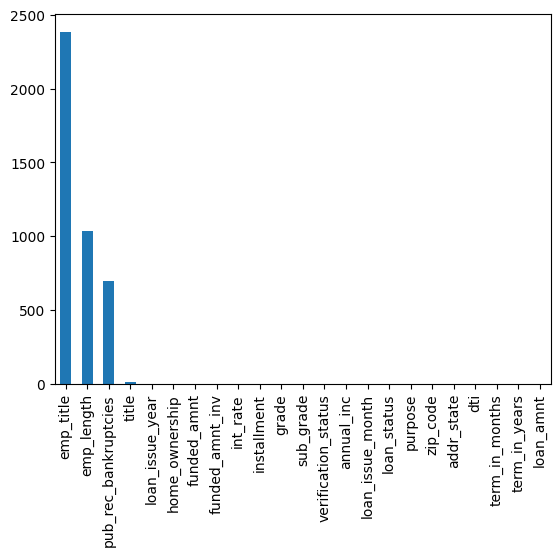

In [257]:
loan_df_final_data.isna().sum().sort_values(ascending=False).plot.bar()

##### Considering NA in "emp_title" as self-employed

In [258]:
loan_df_final_data.emp_title.fillna('self_employed',inplace=True)
loan_df_final_data.emp_title.isna().sum()

0

##### Checking for Null Values in emp_length column

In [259]:
loan_df_final_data[loan_df_final_data.emp_length.isna()].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,term_in_months,term_in_years,loan_issue_month,loan_issue_year
168,2500,2500,2500.0,7.51,77.78,A,A3,self_employed,NaN,OWN,12000.0,Source Verified,Charged Off,debt_consolidation,GET FREE OF DEBT,961xx,CA,16.30,0.0,36,3,Dec,2011
323,18000,18000,18000.0,17.58,452.98,D,D4,self_employed,NaN,MORTGAGE,60000.0,Verified,Fully Paid,debt_consolidation,consolidation,363xx,AL,21.96,0.0,60,5,Dec,2011
394,4000,4000,4000.0,11.71,132.31,B,B3,self_employed,NaN,RENT,24000.0,Source Verified,Fully Paid,home_improvement,Reline pool and fix steeps,328xx,FL,7.50,0.0,36,3,Dec,2011
422,1000,1000,1000.0,14.65,34.50,C,C3,self_employed,NaN,RENT,18408.0,Not Verified,Charged Off,major_purchase,Myloan,080xx,NJ,6.00,1.0,36,3,Dec,2011
439,8250,8250,8250.0,7.51,256.67,A,A3,self_employed,NaN,MORTGAGE,31500.0,Verified,Fully Paid,debt_consolidation,do over,218xx,MD,17.87,0.0,36,3,Dec,2011


##### Here we see that, emp_length is null where ever the emp_tile is also null or as we considered in the previous step, most of the self_employed employees didn't share their work experince in years. Hence we are replacing the nulls with mode value of the column

In [260]:
emp_length_mode = loan_df_final_data.emp_length.mode()[0]
loan_df_final_data.emp_length.fillna(emp_length_mode,inplace=True)
loan_df_final_data.emp_length.isna().sum()

0

##### We are considering that the candidate is nveer bankrupted in case the value of the column is  N/A.Hence filling N/A vaues of the "pub_rec_bankruptcies" colum with 0

In [261]:
loan_df_final_data.pub_rec_bankruptcies.fillna(0.0,inplace=True)
loan_df_final_data.pub_rec_bankruptcies.isna().sum()

0

##### Find Value counts for home_ownership

<AxesSubplot:>

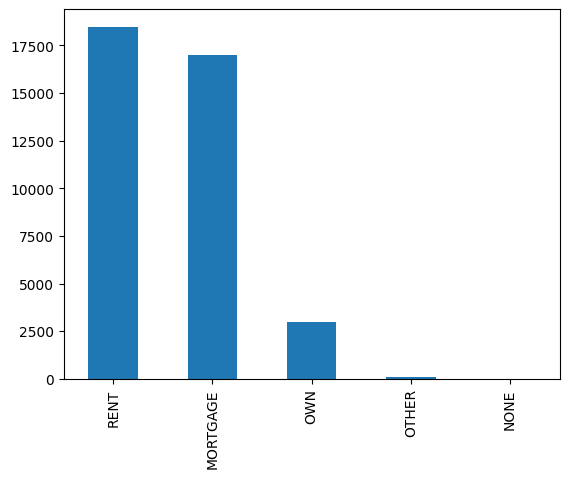

In [262]:
loan_df_final_data.home_ownership.value_counts().plot.bar()

##### Replacing "None" inside "home_ownership" column with most freequent value in the column

In [263]:
loan_df_final_data['home_ownership'] = loan_df_final_data.home_ownership.apply(lambda x : loan_df_final_data['home_ownership'].mode()[0] if x == 'NONE' else x)
loan_df_final_data.home_ownership.value_counts()

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

##### Removing extra xx from zip as it is same accross all the rows which does not make sense

In [264]:
loan_df_final_data['zip_code'] = loan_df_final_data['zip_code'].apply(lambda x : x[:-2])

# Creating a dataFrame for Univariate analysis

## Univariate Categorical Analysis

## Univariate Continous Analysis

# Bivariate Analysis